# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN

# Variáveis

In [ ]:
nr_tests = 30

np.random.seed(50)

# Dataset original

## Descarregamento dos dados do ficheiro CVS_cleaned

In [ ]:
file_path = 'CVD_cleaned.csv'

df = pd.read_csv(file_path)

## Converter dados categóricos para numéricos

In [ ]:
# Converter colunas categóricas para valores numéricos para calcular correlações (somente onde faz sentido)
numerical_data = df.copy()

#Conversão de valor catogoricos para numericos
numerical_data['General_Health'] = numerical_data['General_Health'].map({'Excellent': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})
numerical_data['Checkup'] = numerical_data['Checkup'].map({'Within the past year': 4, 'Within the past 2 years': 3, 'Within the past 5 years': 2, '5 or more years ago':1, 'Never':0 })
numerical_data['Exercise'] = numerical_data['Exercise'].map({'Yes': 1, 'No': 0})
numerical_data['Heart_Disease'] = numerical_data['Heart_Disease'].map({'Yes': 1, 'No': 0}) #Necessario?
numerical_data['Skin_Cancer'] = numerical_data['Skin_Cancer'].map({'Yes': 1, 'No': 0})
numerical_data['Other_Cancer'] = numerical_data['Other_Cancer'].map({'Yes': 1, 'No': 0})
numerical_data['Diabetes'] = numerical_data['Diabetes'].map({'Yes': 3, 'Yes, but female told only during pregnancy':2, 'No, pre-diabetes or borderline diabetes':1, 'No': 0})
numerical_data['Depression'] = numerical_data['Depression'].map({'Yes': 1, 'No': 0})
numerical_data['Arthritis'] = numerical_data['Arthritis'].map({'Yes': 1, 'No': 0})
numerical_data['Sex'] = numerical_data['Sex'].map({'Female': 0, 'Male': 1})
numerical_data['Age_Category'] = numerical_data['Age_Category'].map({'18-24': 0, '25-29': 1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11, '80+':12 })

for column in ['Height_(cm)']:
  numerical_data[column] = numerical_data[column]

numerical_data['Smoking_History'] = numerical_data['Smoking_History'].map({'Yes': 1, 'No': 0})

unique_values = numerical_data.apply(lambda x: x.unique())
print(unique_values)

General_Health                                                    [0, 3, 2, 1, 4]
Checkup                                                           [3, 4, 1, 2, 0]
Exercise                                                                   [0, 1]
Heart_Disease                                                              [0, 1]
Skin_Cancer                                                                [0, 1]
Other_Cancer                                                               [0, 1]
Depression                                                                 [0, 1]
Diabetes                                                             [0, 3, 1, 2]
Arthritis                                                                  [1, 0]
Sex                                                                        [0, 1]
Age_Category                           [10, 8, 11, 12, 9, 6, 5, 0, 2, 7, 3, 4, 1]
Height_(cm)                     [150.0, 165.0, 163.0, 180.0, 191.0, 183.0, 175...
Weight_(kg)     

In [ ]:
# Filtrar apenas linhas onde Heart_Disease é "Yes"
heart_disease_yes = numerical_data[numerical_data['Heart_Disease'] == 1]
heart_disease_no = numerical_data[numerical_data['Heart_Disease'] == 0]

# Contar ocorrências de cada categoria de General_Health
general_health_counts = heart_disease_yes['General_Health'].value_counts()

# Mapeamentos inversos para restaurar os valores categóricos
inverse_mapping_general_health = {4: 'Excellent', 3: 'Very Good', 2: 'Good', 1: 'Fair', 0: 'Poor'}

# Renomear categorias para os nomes originais
general_health_counts.index = general_health_counts.index.map(inverse_mapping_general_health)

# Exibir os resultados
print("Distribuição de General_Health para Heart_Disease = 'Yes':")
print(general_health_counts)

# Contar o número total de "Yes" em Heart_Disease
total_yes = len(heart_disease_yes)
print(f"\nTotal de casos de Heart_Disease = 'Yes': {total_yes}")

# Contar o número total de "Yes" em Heart_Disease
total_no = len(heart_disease_no)
print(f"\nTotal de casos de Heart_Disease = 'No': {total_no}")

Distribuição de General_Health para Heart_Disease = 'Yes':
General_Health
Good         8643
Fair         6789
Very Good    4822
Poor         3602
Excellent    1115
Name: count, dtype: int64

Total de casos de Heart_Disease = 'Yes': 24971

Total de casos de Heart_Disease = 'No': 283883


## Correlações entre features

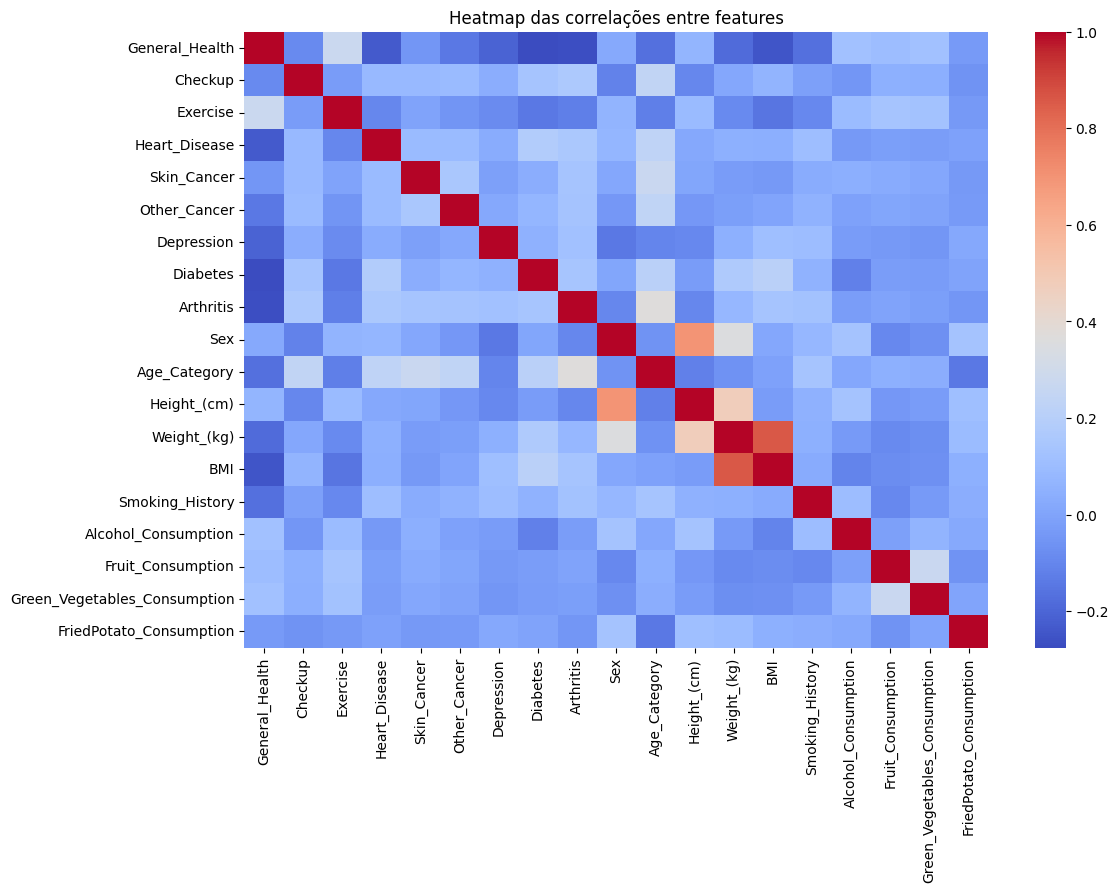

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = numerical_data.corr()

# Plotar o heatmap das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Heatmap das correlações entre features")
plt.show()

## Aplicação dos algoritmos de aprendizagem ao dataset original

### Algoritmos de aprendizagem supervisionada

#### Árvore de decisão

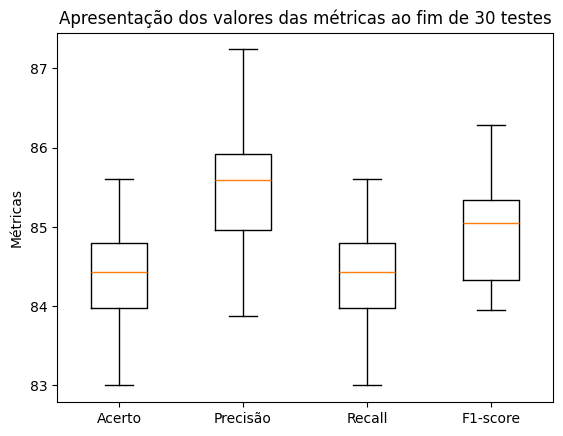

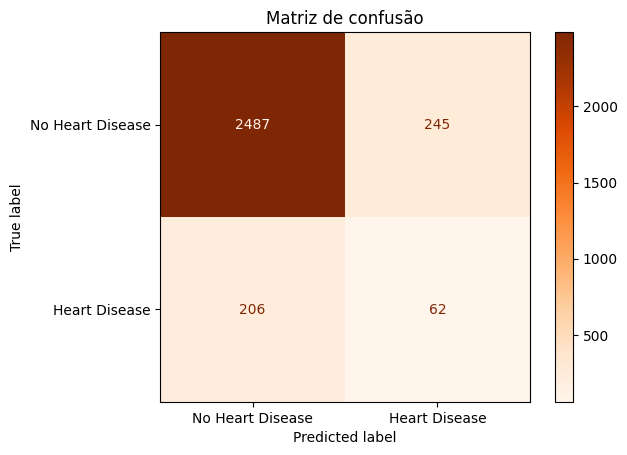

In [ ]:
df_decision_tree = numerical_data[:10000].copy()

# Create a LabelEncoder object
#encoder = LabelEncoder()

# Iterate through all columns and encode categorical features
#for column in df_decision_tree.select_dtypes(include=['object']).columns:
#    df_decision_tree[column] = encoder.fit_transform(df_decision_tree[column])

# Define features (X) and target variable (y) correctly
X = df_decision_tree.drop(['Heart_Disease'], axis=1)  # Features
y = df_decision_tree['Heart_Disease']  # Target variable

# Arrays para guardar as métricas
accuracies_dt = []
precisions_dt = []
recalls_dt = []
f1_scores_dt = []

# Número de testes declarado no início
for _ in range(nr_tests):

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Normalizar os dados (usando apenas os dados de treino para ajustar o scaler)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Ajusta e transforma os dados de treino
    X_test = scaler.transform(X_test)  # Transforma os dados de teste

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred, average='weighted')*100
    recall = recall_score(y_test, y_pred, average='weighted')*100
    f1 = f1_score(y_test, y_pred, average='weighted')*100

    # Append das métricas
    accuracies_dt.append(accuracy)
    precisions_dt.append(precision)
    recalls_dt.append(recall)
    f1_scores_dt.append(f1)

# Avaliar o modelo
plt.boxplot([accuracies_dt, precisions_dt, recalls_dt, f1_scores_dt], tick_labels=['Acerto', 'Precisão', 'Recall', 'F1-score'])
plt.ylabel('Métricas')
plt.title('Apresentação dos valores das métricas ao fim de ' + str(nr_tests) + ' testes')
plt.show()

# Avaliar o modelo
#print(f"Percentagem de acerto: {accuracy:.2f}%")
#print(f"Percentagem de precisão: {precision:.2f}%")
#print(f"Percentagem de recall: {recall:.2f}%")
#print(f"Percentagem de f1-score: {f1:.2f}%")
#print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap="Oranges", xticks_rotation=0.0)
plt.title('Matriz de confusão')
plt.show()

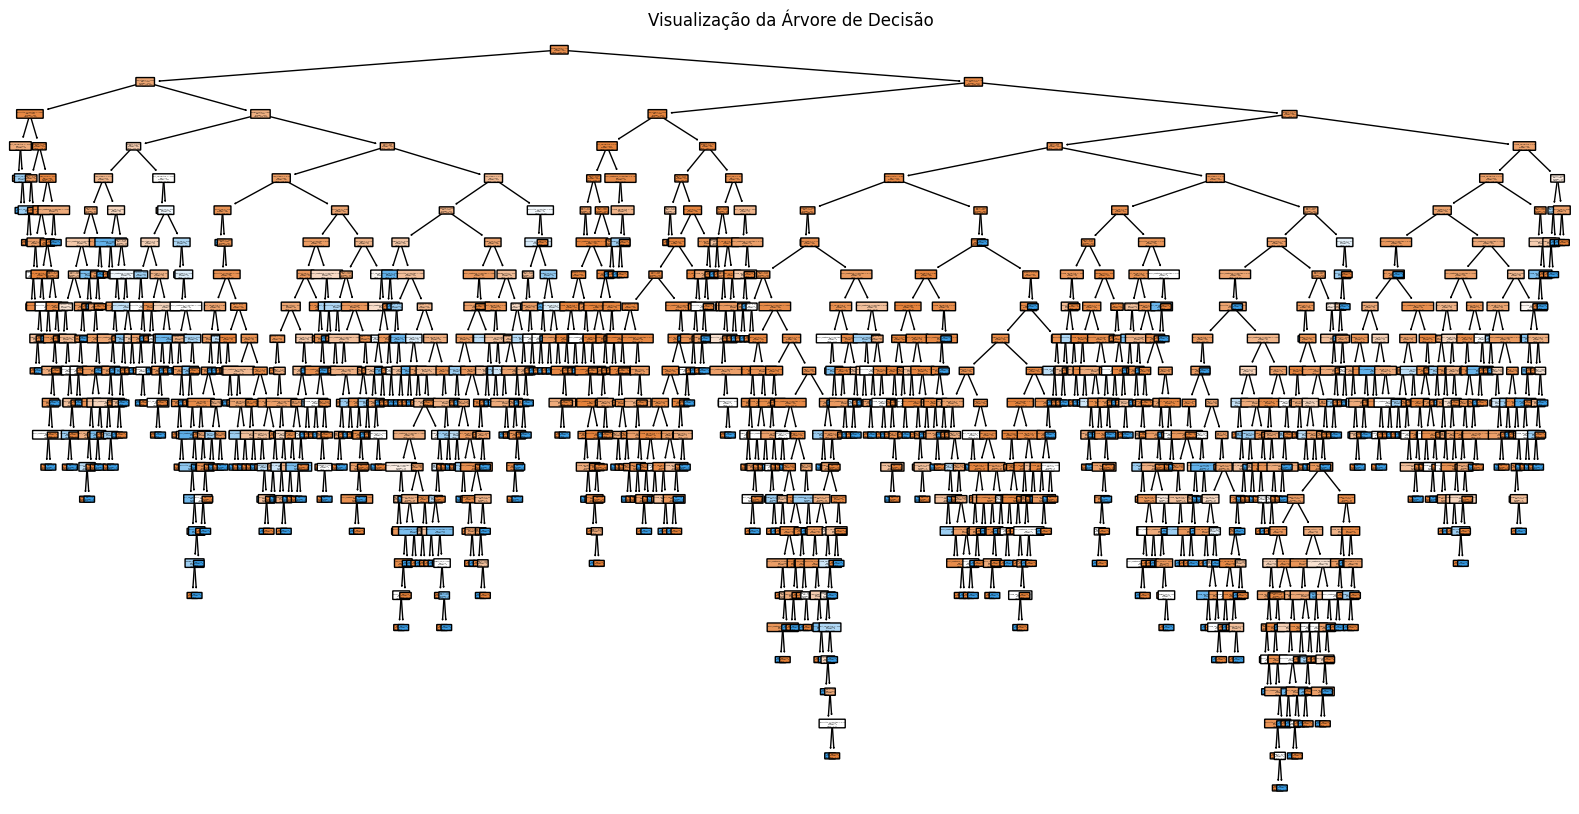

In [ ]:
# Get original class names before encoding
original_class_names = df_decision_tree['Heart_Disease'].unique().astype(str)

# Visualize the trained decision tree
plt.figure(figsize=(20, 10))  # Define o tamanho do gráfico
plot_tree(clf, filled=True, feature_names=X.columns,
          class_names=original_class_names, rounded=True)  # Use original class names here
plt.title("Visualização da Árvore de Decisão")
plt.show()

#### Multi-layer perceptron

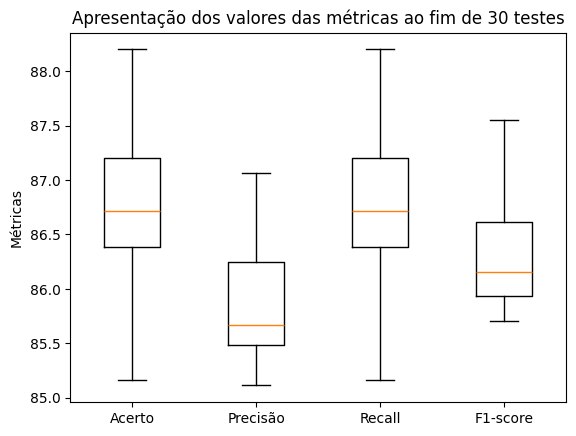

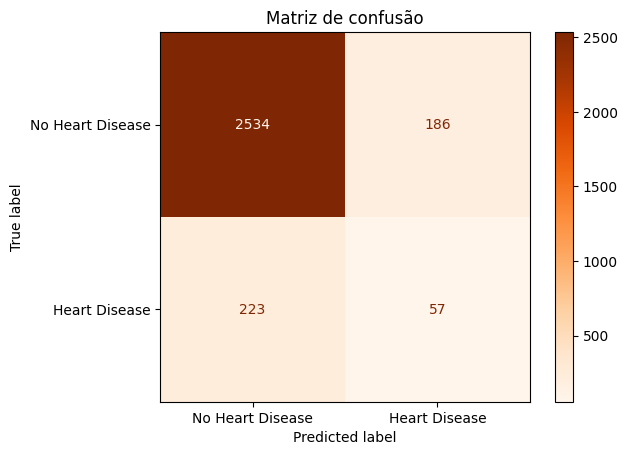

In [ ]:
# Fazer uma cópia do dataset
df_mlp = numerical_data[:10000].copy()

# Codificar variáveis categóricas usando LabelEncoder
#encoder = LabelEncoder()
#for column in df_mlp.select_dtypes(include=['object']).columns:
#    df_mlp[column] = encoder.fit_transform(df_mlp[column])

# Dividir as features (X) e a variável alvo (y)
X = df_mlp.drop(['Heart_Disease'], axis=1)  # Features
y = df_mlp['Heart_Disease']  # Target variable

# Arrays para guardar as métricas
accuracies_mlp = []
precisions_mlp = []
recalls_mlp = []
f1_scores_mlp = []

# Número de testes declarado no início
for _ in range(nr_tests):

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Normalizar os dados (usando apenas os dados de treino para ajustar o scaler)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Ajusta e transforma os dados de treino
    X_test = scaler.transform(X_test)  # Transforma os dados de teste

    # Criar e treinar o classificador MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)
    mlp.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = mlp.predict(X_test)

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred, average='weighted')*100
    recall = recall_score(y_test, y_pred, average='weighted')*100
    f1 = f1_score(y_test, y_pred, average='weighted')*100

    # Append das métricas
    accuracies_mlp.append(accuracy)
    precisions_mlp.append(precision)
    recalls_mlp.append(recall)
    f1_scores_mlp.append(f1)

# Avaliar o modelo
plt.boxplot([accuracies_mlp, precisions_mlp, recalls_mlp, f1_scores_mlp], tick_labels=['Acerto', 'Precisão', 'Recall', 'F1-score'])
plt.ylabel('Métricas')
plt.title('Apresentação dos valores das métricas ao fim de ' + str(nr_tests) + ' testes')
plt.show()

# Avaliar o modelo
#print(f"Percentagem de acerto: {accuracy:.2f}%")
#print(f"Percentagem de precisão: {precision:.2f}%")
#print(f"Percentagem de recall: {recall:.2f}%")
#print(f"Percentagem de f1-score: {f1:.2f}%")
#print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap="Oranges", xticks_rotation=0.0)
plt.title('Matriz de confusão')
plt.show()

#### k-NN

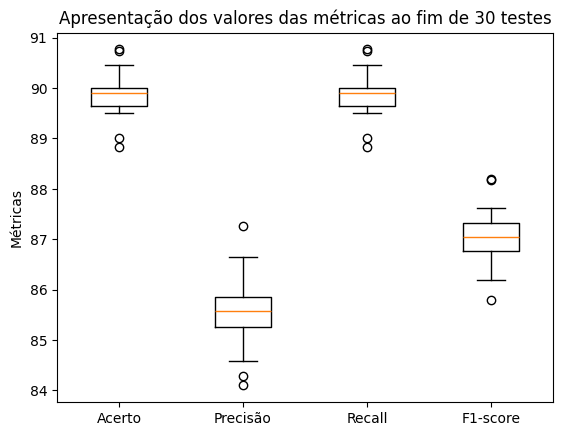

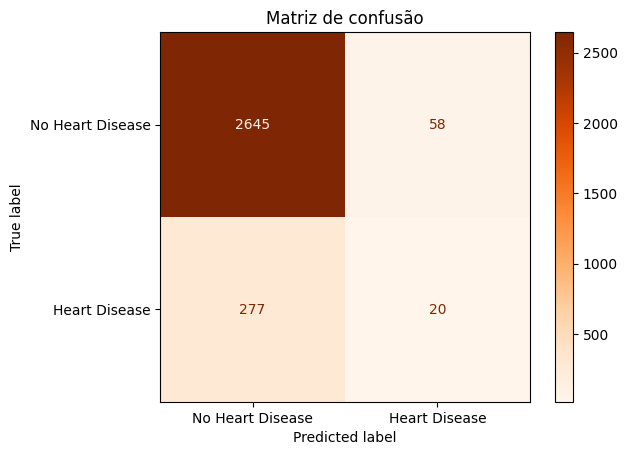

In [ ]:
# Fazer uma cópia do dataset
df_knn = numerical_data[:10000].copy()

# Codificar variáveis categóricas usando LabelEncoder
#encoder = LabelEncoder()
#for column in df_knn.select_dtypes(include=['object']).columns:
#    df_knn[column] = encoder.fit_transform(df_knn[column])

# Dividir as features (X) e a variável alvo (y)
X = df_knn.drop(['Heart_Disease'], axis=1)  # Features
y = df_knn['Heart_Disease']  # Target variable

# Arrays para guardar as métricas
accuracies_knn = []
precisions_knn = []
recalls_knn = []
f1_scores_knn = []

# Número de testes declarado no início
for _ in range(nr_tests):

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Normalizar os dados (usando apenas os dados de treino para ajustar o scaler)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Ajusta e transforma os dados de treino
    X_test = scaler.transform(X_test)  # Transforma os dados de teste

    # Criar e treinar o classificador k-NN
    knn = KNeighborsClassifier(n_neighbors=5)  # k = 5 por padrão
    knn.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = knn.predict(X_test)

    # Cálculo de métricas
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred, average='weighted')*100
    recall = recall_score(y_test, y_pred, average='weighted')*100
    f1 = f1_score(y_test, y_pred, average='weighted')*100

    # Append das métricas
    accuracies_knn.append(accuracy)
    precisions_knn.append(precision)
    recalls_knn.append(recall)
    f1_scores_knn.append(f1)

# Avaliar o modelo
plt.boxplot([accuracies_knn, precisions_knn, recalls_knn, f1_scores_knn], tick_labels=['Acerto', 'Precisão', 'Recall', 'F1-score'])
plt.ylabel('Métricas')
plt.title('Apresentação dos valores das métricas ao fim de ' + str(nr_tests) + ' testes')
plt.show()

# Avaliar o modelo
#print(f"Percentagem de acerto: {accuracy:.2f}%")
#print(f"Percentagem de precisão: {precision:.2f}%")
#print(f"Percentagem de recall: {recall:.2f}%")
#print(f"Percentagem de f1-score: {f1:.2f}%")
#print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap="Oranges", xticks_rotation=0.0)
plt.title('Matriz de confusão')
plt.show()

Visualização em 2D:

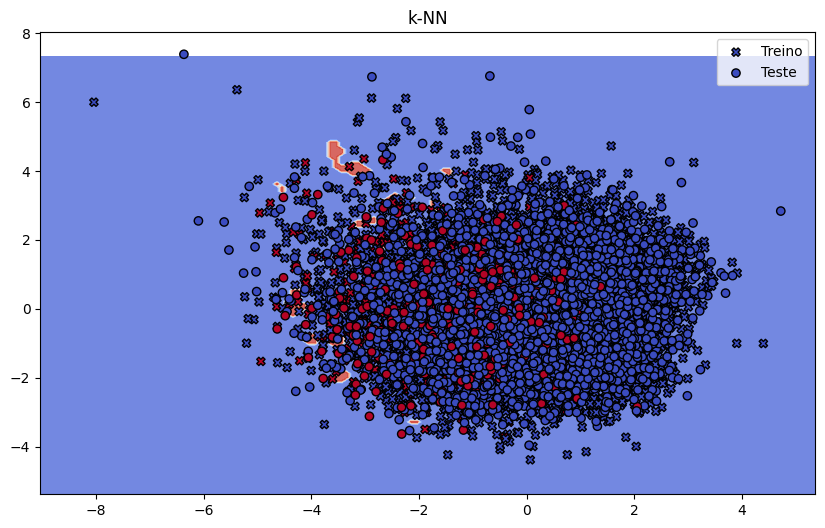

In [ ]:
# Visualizar as fronteiras de decisão em 2D (usando apenas duas features principais)

# Reduzir para 2 dimensões para visualização
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reajustar o modelo com os dados PCA para visualização
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Definir os limites do gráfico
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prever rótulos para cada ponto no espaço
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', marker='X', label='Treino')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='o', label='Teste')
plt.title("k-NN")
plt.legend()
plt.show()

#### Comparação dos algoritmos

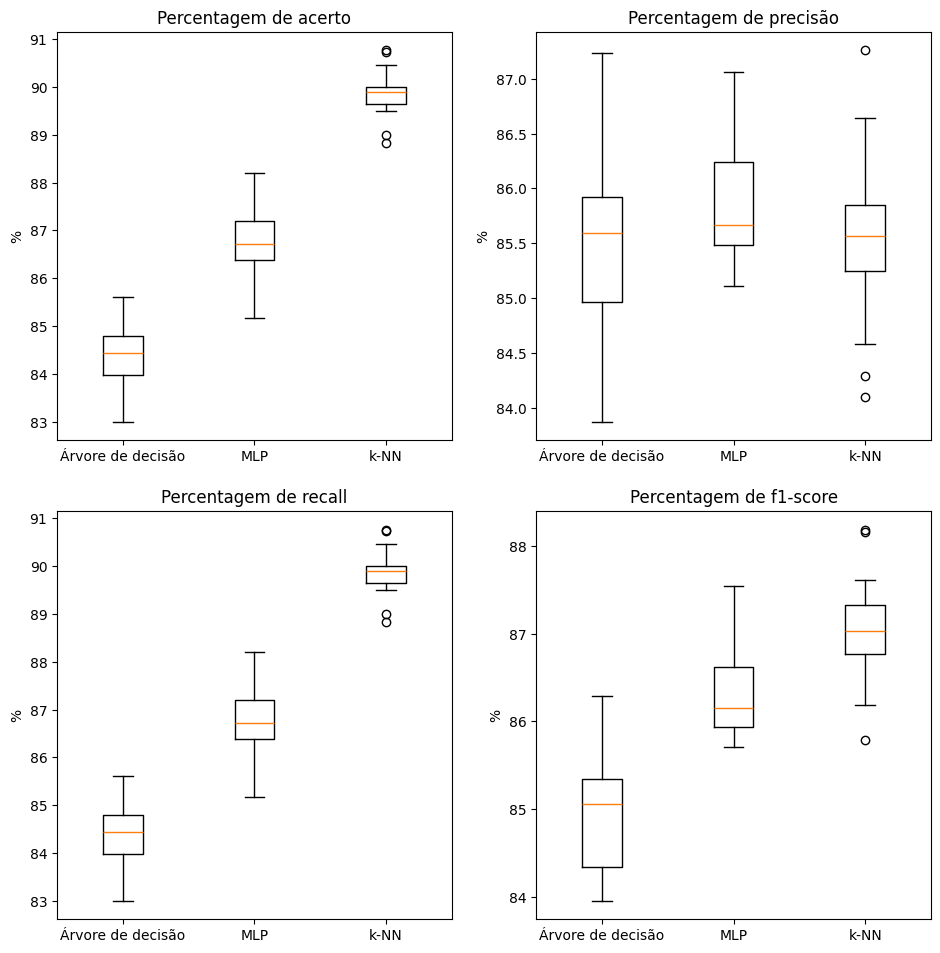

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3.0)

# First boxplot: Accuracy
axes[0, 0].boxplot([accuracies_dt, accuracies_mlp, accuracies_knn], tick_labels=['Árvore de decisão', 'MLP', 'k-NN'])
axes[0, 0].set_ylabel('%')
axes[0, 0].set_title('Percentagem de acerto')

# Second boxplot: Precision
axes[0, 1].boxplot([precisions_dt, precisions_mlp, precisions_knn], tick_labels=['Árvore de decisão', 'MLP', 'k-NN'])
axes[0, 1].set_ylabel('%')
axes[0, 1].set_title('Percentagem de precisão')

# Third boxplot: Recall
axes[1, 0].boxplot([recalls_dt, recalls_mlp, recalls_knn], tick_labels=['Árvore de decisão', 'MLP', 'k-NN'])
axes[1, 0].set_ylabel('%')
axes[1, 0].set_title('Percentagem de recall')

# Fourth boxplot: F1-Score
axes[1, 1].boxplot([f1_scores_dt, f1_scores_mlp, f1_scores_knn], tick_labels=['Árvore de decisão', 'MLP', 'k-NN'])
axes[1, 1].set_ylabel('%')
axes[1, 1].set_title('Percentagem de f1-score')

plt.show()

### Algoritmos de aprendizagem não supervisionada

#### k-Means

Distribuição de Heart Disease por Cluster:
Heart_Disease         0         1
Cluster                          
0              0.800000  0.200000
1              0.980769  0.019231
2              0.888889  0.111111
3              0.800000  0.200000
4              0.770492  0.229508
...                 ...       ...
295            1.000000       NaN
296            0.892857  0.107143
297            1.000000       NaN
298            1.000000       NaN
299            0.823529  0.176471

[300 rows x 2 columns]
Cluster com maior proporção de Heart Disease: 20

Proporções para o Cluster 20:
Heart_Disease
0    0.333333
1    0.666667
Name: 20, dtype: float64

Frequências das features no cluster com mais Heart Desease:

General_Health: Fair

Checkup: 5 or more years ago

Exercise: No

Skin_Cancer: No

Other_Cancer: No

Depression: No

Diabetes: Yes

Arthritis: No

Sex: Male

Age_Category: 50-54

Height_(cm): 185.0

Weight_(kg): 94.35

BMI: 27.44

Smoking_History: Yes

Alcohol_Consumption: 0.0

Fru

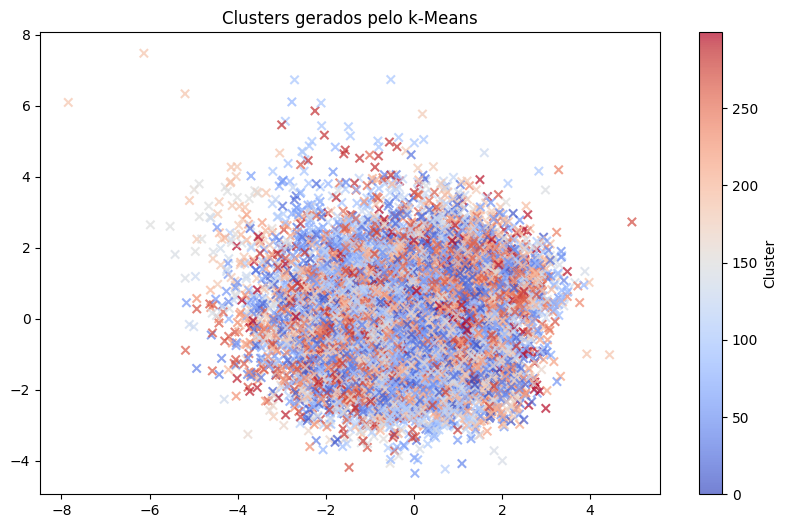

In [ ]:
# Copiar o dataset original
df_kmeans = numerical_data[:10000].copy()

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans.drop(columns=['Heart_Disease']))

# Aplicar k-Means com 3 clusters
kmeans = KMeans(n_clusters=300, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(X_scaled)

# Relacionar clusters com Heart_Disease
cluster_analysis = df_kmeans.groupby('Cluster')['Heart_Disease'].value_counts(normalize=True).unstack()
print("Distribuição de Heart Disease por Cluster:")
print(cluster_analysis)

# Identificar o cluster com maior proporção de Heart Disease
highest_risk_cluster = cluster_analysis[1].idxmax()
print(f"Cluster com maior proporção de Heart Disease: {highest_risk_cluster}")

# Exibir os valores específicos para o cluster com maior risco
highest_risk_values = cluster_analysis.loc[highest_risk_cluster]
print(f"\nProporções para o Cluster {highest_risk_cluster}:")
print(highest_risk_values)

# Filtrar o cluster com maior risco
cluster_data = df_kmeans[df_kmeans['Cluster'] == highest_risk_cluster].copy()

# Mapeamentos inversos para restaurar valores categóricos
inverse_mappings = {
    'General_Health': {4: 'Excellent', 3: 'Very Good', 2: 'Good', 1: 'Fair', 0: 'Poor'},
    'Checkup': {4: 'Within the past year', 3: 'Within the past 2 years',
                2: 'Within the past 5 years', 1: '5 or more years ago', 0: 'Never'},
    'Exercise': {1: 'Yes', 0: 'No'},
    'Heart_Disease': {1: 'Yes', 0: 'No'},
    'Skin_Cancer': {1: 'Yes', 0: 'No'},
    'Other_Cancer': {1: 'Yes', 0: 'No'},
    'Diabetes': {3: 'Yes', 2: 'Yes, but female told only during pregnancy',
                 1: 'No, pre-diabetes or borderline diabetes', 0: 'No'},
    'Depression': {1: 'Yes', 0: 'No'},
    'Arthritis': {1: 'Yes', 0: 'No'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Age_Category': {0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-44',
                     5: '45-49', 6: '50-54', 7: '55-59', 8: '60-64', 9: '65-69',
                     10: '70-74', 11: '75-79', 12: '80+'},
    'Smoking_History': {1: 'Yes', 0: 'No'}
}

# Aplicar os mapeamentos inversos
for column, mapping in inverse_mappings.items():
    if column in cluster_data.columns:
        cluster_data[column] = cluster_data[column].astype(object).map(mapping)

# Calcular as frequências absolutas de cada categoria em features categóricas
frequent_features = {}

for column in cluster_data.columns:
    if column not in ['Cluster', 'Heart_Disease']:  # Ignorar as colunas 'Cluster' e 'Heart_Disease'
        # Contar as frequências de valores únicos
        value_counts = cluster_data[column].value_counts()
        frequent_features[column] = value_counts

# Exibir as frequências absolutas de cada feature
print("\nFrequências das features no cluster com mais Heart Desease:")
for feature, counts in frequent_features.items():
    most_frequent_value = counts.idxmax()  # Valor com mais ocorrências
    print(f"\n{feature}: {most_frequent_value}")

# Reduzir para 2D para visualização
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_kmeans['Cluster'], cmap='coolwarm', marker='x', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusters gerados pelo k-Means')
plt.show()

#### DBScan

Distribuição de Heart Disease por Cluster:
Heart_Disease         0         1
Cluster                          
-1             0.876091  0.123909
 0             0.920290  0.079710
 1             0.880734  0.119266
 2             0.924211  0.075789
 3             0.813333  0.186667
 4             0.941413  0.058587
 5             0.986346  0.013654
 6             0.783019  0.216981
 7             0.886621  0.113379
 8             0.907268  0.092732
 9             0.908832  0.091168
 10            0.839228  0.160772
 11            0.979633  0.020367
 12            0.940000  0.060000
 13            0.971596  0.028404
 14            0.946237  0.053763
 15            0.978599  0.021401
 16            0.972015  0.027985
 17            0.923664  0.076336
 18            0.966418  0.033582
 19            0.688235  0.311765
 20            0.984026  0.015974
 21            0.929487  0.070513
 22            0.736842  0.263158
 23            0.975229  0.024771
 24            0.900000  0.100000
 25  

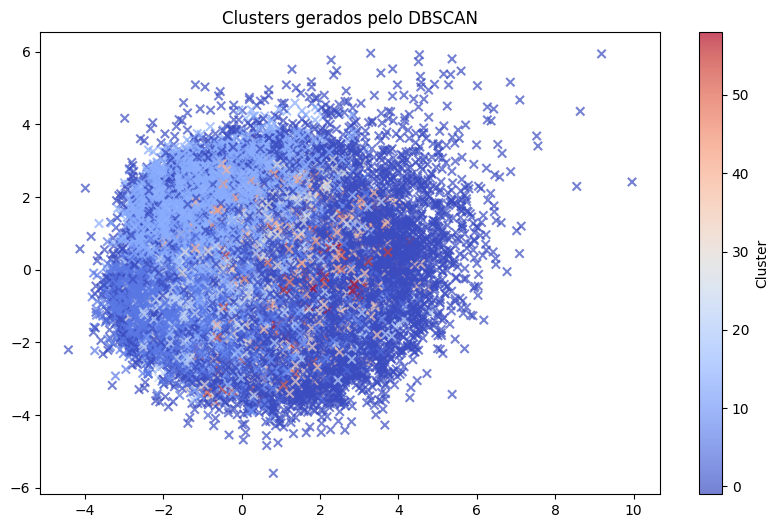

In [ ]:
# Copiar o dataset original
df_dbscan = numerical_data[:50000].copy()

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dbscan.drop(columns=['Heart_Disease']))

# Aplicar DBSCAN
dbscan = DBSCAN(eps=2, min_samples=40)  # Ajuste eps e min_samples conforme necessário
df_dbscan['Cluster'] = dbscan.fit_predict(X_scaled)

# Relacionar clusters com Heart_Disease
cluster_analysis = df_dbscan.groupby('Cluster')['Heart_Disease'].value_counts(normalize=True).unstack()
print("Distribuição de Heart Disease por Cluster:")
print(cluster_analysis)

# Identificar o cluster com maior proporção de Heart Disease
highest_risk_cluster = cluster_analysis[1].idxmax()
print(f"Cluster com maior proporção de Heart Disease: {highest_risk_cluster}")

# Exibir os valores específicos para o cluster com maior risco
highest_risk_values = cluster_analysis.loc[highest_risk_cluster]
print(f"\nProporções para o Cluster {highest_risk_cluster}:")
print(highest_risk_values)

# Filtrar o cluster com maior risco
cluster_data = df_dbscan[df_dbscan['Cluster'] == highest_risk_cluster].copy()

# Mapeamentos inversos para restaurar valores categóricos
inverse_mappings = {
    'General_Health': {4: 'Excellent', 3: 'Very Good', 2: 'Good', 1: 'Fair', 0: 'Poor'},
    'Checkup': {4: 'Within the past year', 3: 'Within the past 2 years',
                2: 'Within the past 5 years', 1: '5 or more years ago', 0: 'Never'},
    'Exercise': {1: 'Yes', 0: 'No'},
    'Heart_Disease': {1: 'Yes', 0: 'No'},
    'Skin_Cancer': {1: 'Yes', 0: 'No'},
    'Other_Cancer': {1: 'Yes', 0: 'No'},
    'Diabetes': {3: 'Yes', 2: 'Yes, but female told only during pregnancy',
                 1: 'No, pre-diabetes or borderline diabetes', 0: 'No'},
    'Depression': {1: 'Yes', 0: 'No'},
    'Arthritis': {1: 'Yes', 0: 'No'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Age_Category': {0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-44',
                     5: '45-49', 6: '50-54', 7: '55-59', 8: '60-64', 9: '65-69',
                     10: '70-74', 11: '75-79', 12: '80+'},
    'Smoking_History': {1: 'Yes', 0: 'No'}
}

# Aplicar os mapeamentos inversos
for column, mapping in inverse_mappings.items():
    if column in cluster_data.columns:
        cluster_data[column] = cluster_data[column].astype(object).map(mapping)

# Calcular as frequências absolutas de cada categoria em features categóricas
frequent_features = {}

for column in cluster_data.columns:
    if column not in ['Cluster', 'Heart_Disease']:  # Ignorar as colunas 'Cluster' e 'Heart_Disease'
        # Contar as frequências de valores únicos
        value_counts = cluster_data[column].value_counts()
        frequent_features[column] = value_counts

# Exibir as frequências absolutas de cada feature
print("\nFrequências das features no cluster com mais Heart Desease:")
for feature, counts in frequent_features.items():
    most_frequent_value = counts.idxmax()  # Valor com mais ocorrências
    print(f"\n{feature}: {most_frequent_value}")

# Reduzir para 2D para visualização
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_dbscan['Cluster'], cmap='coolwarm', marker='x', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusters gerados pelo DBSCAN')
plt.show()

# Remoção de 10% e 20% dos dados

In [ ]:
def remover_dados(df,percentual_remocao):

  # Substituir 10% dos valores de cada linha por NaN
  for index, row in df.iterrows():
    # Selecionar colunas aleatórias na linha
    num_colunas = len(row)
    colunas_a_remover = np.random.choice(row.index, size=round(num_colunas * percentual_remocao), replace=False)
    # Substituir os valores escolhidos por NaN
    df.loc[index, colunas_a_remover] = np.nan
  return df

numero_registos = 10
df_copia = df.sample(n=numero_registos, random_state=42)
#print(df_copia.iloc[2])

df_delete_dez = remover_dados(df_copia,0.1)
df_delete_vinte = remover_dados(df_copia,0.2)

# Tratamento dos dados eliminados

## Para 10% dos dados (Valor mais comum e Valor medio)



In [ ]:
# Copiar do dataset dos dados eliminados para outro dataset

#Filtração do dataset para conter só os registos que contém pelo menos um nan

#linhas_com_nulos = df_delete_dez[df_delete_dez.isnull().any(axis=1)]
#print(linhas_com_nulos)
#df_delete_dez_comum = linhas_com_nulos
#df_delete_dez_mean = linhas_com_nulos

df_delete_dez_comum = df_delete_dez
df_delete_dez_mean = df_delete_dez

# Tratamento dos dados eliminados através da substituição pelo valor mais comum
for coluna_comum in df_delete_dez_comum.columns:
    valor_mais_comum = df_delete_dez_mean[coluna_comum].mode()[0]  # Calcula o valor mais comum
    df_delete_dez_comum[coluna_comum] = df_delete_dez_comum[coluna_comum].fillna(valor_mais_comum)  # Substitui valores nulos


# Tratamento dos dados eliminados através da substituição pelo valor médio

# É realizado uma conversão das colunas quantativas para numericos, para obter o valor médio dessas colunas

# Identificar colunas qualitativas
categorical_cols = df_delete_dez_mean.select_dtypes(include=['object', 'category']).columns

# Criação de um dicionário para mapear categorias para valores numéricos e vice-versa
categorical_maps = {}

# Converter os valores categoricos para valores numéricos
for col in categorical_cols:
    unique_categories = df_delete_dez_mean[col].dropna().unique()
    category_to_num = {cat: num for num, cat in enumerate(unique_categories)}
    num_to_category = {num: cat for cat, num in category_to_num.items()}
    categorical_maps[col] = {'cat_to_num': category_to_num, 'num_to_cat': num_to_category}
    df_delete_dez_mean[col] = df_delete_dez_mean[col].map(category_to_num)

# Passo 3: Obter o valor médio para cada coluna
means = {}
for col in df_delete_dez_mean.columns:
    means[col] = df_delete_dez_mean[col].mean()

# Passo 4: Substituir valores nulos pelo valor médio
for col in df_delete_dez_mean.columns:
    df_delete_dez_mean[col] = df_delete_dez_mean[col].fillna(means[col])

# Passo 5: Reversão das colunas qualitativas de valores numéricos para as categorias originais
for col in categorical_cols:
    df_delete_dez_mean[col] = df_delete_dez_mean[col].round().astype(int).map(categorical_maps[col]['num_to_cat'])

print(df_delete_dez_comum)
print(df_delete_dez_mean)

       General_Health                  Checkup Exercise Heart_Disease  \
302051      Very Good     Within the past year      Yes            No   
59950       Very Good     Within the past year      Yes            No   
203639      Very Good     Within the past year      Yes            No   
78768       Very Good     Within the past year      Yes            No   
216156           Fair     Within the past year      Yes            No   
84107       Very Good     Within the past year      Yes            No   
284341      Excellent     Within the past year      Yes            No   
227575      Very Good     Within the past year      Yes            No   
19010            Good  Within the past 2 years      Yes            No   
123471      Excellent  Within the past 5 years      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
302051          No           No         No   
59950           No           No         No   
203639          No           No         No   
78768       

## Para 20% dos dados (Valor mais comum e Valor medio)

In [ ]:
# Copiar do dataset dos dados eliminados para outro dataset

#Filtração do dataset para conter só os registos que contém pelo menos um nan

#linhas_com_nulos = df_delete_vinte[df_delete_vinte.isnull().any(axis=1)]
#print(linhas_com_nulos)
#df_delete_vinte_comum = linhas_com_nulos
#df_delete_vinte_mean = linhas_com_nulos

df_delete_vinte_comum = df_delete_vinte
df_delete_vinte_mean = df_delete_vinte

# Tratamento dos dados eliminados através da substituição pelo valor mais comum
for coluna_comum in df_delete_vinte_comum.columns:
    valor_mais_comum = df_delete_vinte_comum[coluna_comum].mode()[0]  # Calcula o valor mais comum
    df_delete_vinte_comum[coluna_comum] = df_delete_vinte_comum[coluna_comum].fillna(valor_mais_comum)  # Substitui valores nulos

# Tratamento dos dados eliminados através da substituição pelo valor médio

# Identificar colunas qualitativas
categorical_cols = df_delete_vinte_mean.select_dtypes(include=['object', 'category']).columns

# Criação de um dicionário para mapear categorias para valores numéricos e vice-versa
categorical_maps = {}

# Converter valores categoricos para valores numéricos
for col in categorical_cols:
    unique_categories = df_delete_vinte_mean[col].dropna().unique()
    category_to_num = {cat: num for num, cat in enumerate(unique_categories)}
    num_to_category = {num: cat for cat, num in category_to_num.items()}
    categorical_maps[col] = {'cat_to_num': category_to_num, 'num_to_cat': num_to_category}
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].map(category_to_num)

# Passo 3: Obter o valor médio para cada coluna
means = {}
for col in df_delete_vinte_mean.columns:
    means[col] = df_delete_vinte_mean[col].mean()

# Passo 4: Substituir valores nulos pelo valor médio
for col in df_delete_vinte_mean.columns:
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].fillna(means[col])

# Passo 5: Reverter colunas qualitativas de valores numéricos para categorias originais
for col in categorical_cols:
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].round().astype(int).map(categorical_maps[col]['num_to_cat'])

print(df_delete_vinte_comum)
print(df_delete_vinte_mean)

       General_Health                  Checkup Exercise Heart_Disease  \
302051      Very Good     Within the past year      Yes            No   
59950       Very Good     Within the past year      Yes            No   
203639      Very Good     Within the past year      Yes            No   
78768       Very Good     Within the past year      Yes            No   
216156           Fair     Within the past year      Yes            No   
84107       Very Good     Within the past year      Yes            No   
284341      Excellent     Within the past year      Yes            No   
227575      Very Good     Within the past year      Yes            No   
19010            Good  Within the past 2 years      Yes            No   
123471      Excellent  Within the past 5 years      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
302051          No           No         No   
59950           No           No         No   
203639          No           No         No   
78768       

# Normalização dos dados

In [ ]:
def min_max_normalization(df, columns):
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

def z_score_normalization(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df



## Min-Max

Para a normalização dos dados, foi feito nas colunas "Height_(cm)' de cm para m, "Fruit_Consumption" para [0,1], "Green_Vegetables_Consumption" para [0,1] e "FriedPotato_Consumption" para [0,1]

Nota: Existe um gama de valores que representa mellhor os valores de consumo?

In [ ]:
df_min_max = df.copy()

#Valido?
for column in ['Height_(cm)']:
  df_min_max[column] = df_min_max[column]/100

df_min_max = min_max_normalization(df_min_max, ['Fruit_Consumption'])
df_min_max = min_max_normalization(df_min_max, ['Green_Vegetables_Consumption'])
df_min_max = min_max_normalization(df_min_max, ['FriedPotato_Consumption'])

df_min_max.rename(columns={'Height_(cm)': 'Height_(m)'}, inplace=True)
df_min_max.rename(columns={'Fruit_Consumption': 'Fruit_Consumption [0,1]'}, inplace=True)
df_min_max.rename(columns={'Green_Vegetables_Consumption': 'Green_Vegetables_Consumption [0,1]'}, inplace=True)
df_min_max.rename(columns={'FriedPotato_Consumption': 'FriedPotato_Consumption [0,1]'}, inplace=True)

print(df_min_max)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

## Z-score

Para a normalização dos dados, foi feito nas colunas "Fruit_Consumption", "Green_Vegetables_Consumption" e "FriedPotato_Consumption"

In [ ]:
df_z_score = df.copy()

df_z_score = z_score_normalization(df_z_score, ['Fruit_Consumption'])
df_z_score = z_score_normalization(df_z_score, ['Green_Vegetables_Consumption'])
df_z_score = z_score_normalization(df_z_score, ['FriedPotato_Consumption'])

df_z_score.rename(columns={'Fruit_Consumption': 'Fruit_Consumption [0,1]'}, inplace=True)
df_z_score.rename(columns={'Green_Vegetables_Consumption': 'Green_Vegetables_Consumption [0,1]'}, inplace=True)
df_z_score.rename(columns={'FriedPotato_Consumption': 'FriedPotato_Consumption [0,1]'}, inplace=True)

print(df_z_score)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

# Discritização dos dados

Para a discritização dos dados foi escolhida as colunas relativamente ao BMI, Fruit_Consumption, Green_Vegetables_Consumption e FriedPotato_Consumption

Para os valores discretos em cada coluna são:

BMI:

Menor que 18,5 -> Magreza

18,5 a 24,9	-> Normal

25 a 29,9	-> Sobrepeso

30 a 34,9	-> Obesidade grau I

35 a 39,9	-> Obesidade grau II

Maior que 40 -> Obesidade grau III

Fruit_Consumption, Green_Vegetables_Consumption e FriedPotato_Consumption:

Menor que 25 -> Muito Pouco

25 a 49,9 -> Pouco

50 a 74,9 -> Bom

75 a 99,9 -> Muito

Maior que 100 -> Excesso


In [ ]:
df_discretization = df.copy()
bmi_labels = ["Magreza","Normal","Sobrepeso","Obesidade grau I","Obesidade grau II","Obesidade grau III"]
consummtion_labels = ["Muito Pouco","Pouco","Bom","Muito","Excesso"]

## Equal-Width binning

In [ ]:
# Classes de BMI para Equal-Width Binning
df_discretization["BMI_Equal_Width"]  = pd.cut(df_discretization["BMI"],bins=[-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],labels=bmi_labels,right=True)

df_discretization["Fruit_Consumption_Equal_Width"] = pd.cut(df_discretization["Fruit_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9, np.inf],labels=consummtion_labels,right=True)
df_discretization["Green_Vegetables_Consumption_Equal_Width"]  = pd.cut(df_discretization["Green_Vegetables_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9,np.inf],labels=consummtion_labels,right=True)
df_discretization["FriedPotato_Consumption_Equal_Width"]  = pd.cut(df_discretization["FriedPotato_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9, np.inf],labels=consummtion_labels,right=True)

print(df_discretization[['BMI', 'BMI_Equal_Width']])
print(df_discretization[['Fruit_Consumption', 'Fruit_Consumption_Equal_Width']])
print(df_discretization[['Green_Vegetables_Consumption', 'Green_Vegetables_Consumption_Equal_Width']])
print(df_discretization[['FriedPotato_Consumption','FriedPotato_Consumption_Equal_Width']])


          BMI   BMI_Equal_Width
0       14.54           Magreza
1       28.29         Sobrepeso
2       33.47  Obesidade grau I
3       28.73         Sobrepeso
4       24.37            Normal
...       ...               ...
308849  29.05         Sobrepeso
308850  21.48            Normal
308851  24.69            Normal
308852  23.73            Normal
308853  31.71  Obesidade grau I

[308854 rows x 2 columns]
        Fruit_Consumption Fruit_Consumption_Equal_Width
0                    30.0                         Pouco
1                    30.0                         Pouco
2                    12.0                   Muito Pouco
3                    30.0                         Pouco
4                     8.0                   Muito Pouco
...                   ...                           ...
308849               30.0                         Pouco
308850               15.0                   Muito Pouco
308851               40.0                         Pouco
308852               30.0    

## Equal-Height binning

In [ ]:
print(df_discretization['Fruit_Consumption'].unique())
print(df_discretization['Green_Vegetables_Consumption'].unique())
print(df_discretization['FriedPotato_Consumption'].unique())

In [ ]:
# Classes de BMI para Equal-Height Binning
df_discretization["BMI_Equal_Height"] = pd.qcut(df_discretization["BMI"], q=len(bmi_labels), labels=bmi_labels)

df_discretization["Fruit_Consumption_Equal_Height"] = pd.qcut(df_discretization["Fruit_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)
df_discretization["Green_Vegetables_Consumption_Equal_Height"] = pd.qcut(df_discretization["Green_Vegetables_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)
df_discretization["FriedPotato_Consumption_Equal_Height"] = pd.qcut(df_discretization["FriedPotato_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)

print(df_discretization[['BMI', 'BMI_Equal_Height']])
print(df_discretization[['Fruit_Consumption', 'Fruit_Consumption_Equal_Height']])
print(df_discretization[['Green_Vegetables_Consumption', 'Green_Vegetables_Consumption_Equal_Height']])

print(df_discretization[['FriedPotato_Consumption']])
print(df_discretization[['FriedPotato_Consumption_Equal_Height']])


          BMI   BMI_Equal_Height
0       14.54            Magreza
1       28.29   Obesidade grau I
2       33.47  Obesidade grau II
3       28.73   Obesidade grau I
4       24.37             Normal
...       ...                ...
308849  29.05   Obesidade grau I
308850  21.48            Magreza
308851  24.69             Normal
308852  23.73             Normal
308853  31.71  Obesidade grau II

[308854 rows x 2 columns]
        Fruit_Consumption Fruit_Consumption_Equal_Height
0                    30.0                            Bom
1                    30.0                            Bom
2                    12.0                          Pouco
3                    30.0                            Bom
4                     8.0                    Muito Pouco
...                   ...                            ...
308849               30.0                            Bom
308850               15.0                          Pouco
308851               40.0                          Muito
308852 

# Redução dos dados

In [ ]:
nomes_colunas = df.columns.tolist()
print(nomes_colunas)

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


## Attribute Sampling

Colunas retiradas -> Skin_Cancer, Other_Cancer, Depression e Arthritis

In [ ]:
df_Reduction_attribute_sampling = df[[
    'General_Health',
    'Checkup',
    'Exercise',
    'Heart_Disease',
    'Diabetes',
    'Sex',
    'Age_Category',
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Smoking_History',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption'
    ]]
print(df_Reduction_attribute_sampling)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

                                          Diabetes     Sex Age_Category  \
0                                               

In [ ]:
print(df_Reduction_attribute_sampling.columns.tolist())

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Diabetes', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


## Aggregation

In [ ]:
#Colunas a juntar
#Skin_Cancer, Other Cancer -> Have Cancer
#Fruit_Consumption, Green_Vegetables_Consumption -> Alimentação Saudavel Consumo
#Metodo de agregação para Consumo de alimentação Saudavel?

In [ ]:
df_Reduction_aggregation = df.copy()

print(df_Reduction_aggregation['Skin_Cancer'].unique())
print(df_Reduction_aggregation['Other_Cancer'].unique())

#Criação de uma nova colunas, chamada 'Have_Cancer' que será o resultado a combinação das colunas 'Skin_Cancer' e 'Other_Cancer'

df_Reduction_aggregation['Have_Cancer'] = df_Reduction_aggregation.apply(
    lambda row: 'yes' if row['Skin_Cancer'] == 'Yes' or row['Other_Cancer'] == 'Yes' else 'no', axis=1
)
df_Reduction_aggregation = df_Reduction_aggregation.drop(['Skin_Cancer', 'Other_Cancer'], axis=1)

print(df_Reduction_aggregation['Have_Cancer'])
print(df_Reduction_aggregation['Have_Cancer'].unique())
print(df_Reduction_aggregation)

['No' 'Yes']
['No' 'Yes']
0         no
1         no
2         no
3         no
4         no
          ..
308849    no
308850    no
308851    no
308852    no
308853    no
Name: Have_Cancer, Length: 308854, dtype: object
['no' 'yes']
       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the pa